# Yelp Project [working title]

David Skarbrevik 2018

In [8]:
import pandas as pd
import numpy as np
from collections import Counter
from scipy import stats, integrate
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import arrow
import datetime


%matplotlib inline
sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

### Read data files:

In [3]:
df_business = pd.read_csv("E:\\Data Science Playgrounds\\Yelp dataset\\yelp_business.csv")
df_biz_attributes = pd.read_csv("E:\\Data Science Playgrounds\\Yelp dataset\\yelp_business_attributes.csv")
df_business_hours = pd.read_csv("E:\\Data Science Playgrounds\\Yelp dataset\\yelp_business_hours.csv")
df_checkin = pd.read_csv("E:\\Data Science Playgrounds\\Yelp dataset\\yelp_checkin.csv")
df_tips = pd.read_csv("E:\\Data Science Playgrounds\\Yelp dataset\\yelp_tip.csv")
df_users = pd.read_csv("E:\\Data Science Playgrounds\\Yelp dataset\\yelp_user.csv")

### Business data files

**business.csv**

In [6]:
df_business.head(n=1)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.33069,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...


In [7]:
df_business.shape

(174567, 13)

In [10]:
df_business.describe()

,latitude,longitude,stars,review_count,is_open
count,174566.000000,174566.000000,174567.000000,174567.000000,174567.000000
mean,38.627312,-92.679009,3.632196,30.137059,0.840376
std,5.389012,26.240079,1.003739,98.208174,0.366258
min,-36.086009,-142.466650,1.000000,3.000000,0.000000
25%,33.631550,-112.125879,3.000000,4.000000,1.000000
50%,36.144257,-89.410128,3.500000,8.000000,1.000000
75%,43.606181,-79.657609,4.500000,23.000000,1.000000
max,89.999314,115.086769,5.000000,7361.000000,1.000000


In [50]:
if df_business[df_business.isnull().any(axis=1)].empty:
    print("No missing values!")
else:
    print("Missing data from {} rows".format(df_business[df_business.isnull().any(axis=1)].shape[0]))

Missing data from 106826 rows


In [51]:
df_business.isnull().sum()

business_id          0
name                 0
neighborhood    106552
address              0
city                 1
state                1
postal_code        623
latitude             1
longitude            1
stars                0
review_count         0
is_open              0
categories           0
dtype: int64

**business_attributes.csv**

In [13]:
df_biz_attributes.head(n=1)

,business_id,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,HairSpecializesIn_africanamerican,HairSpecializesIn_curly,HairSpecializesIn_perms,HairSpecializesIn_kids,HairSpecializesIn_extensions,HairSpecializesIn_asian,HairSpecializesIn_straightperms,RestaurantsPriceRange2,GoodForKids,WheelchairAccessible,BikeParking,Alcohol,HasTV,NoiseLevel,RestaurantsAttire,Music_dj,Music_background_music,Music_no_music,Music_karaoke,Music_live,Music_video,Music_jukebox,Ambience_romantic,Ambience_intimate,Ambience_classy,Ambience_hipster,Ambience_divey,Ambience_touristy,Ambience_trendy,Ambience_upscale,Ambience_casual,RestaurantsGoodForGroups,Caters,WiFi,RestaurantsReservations,RestaurantsTakeOut,HappyHour,GoodForDancing,RestaurantsTableService,OutdoorSeating,RestaurantsDelivery,BestNights_monday,BestNights_tuesday,BestNights_friday,BestNights_wednesday,BestNights_thursday,BestNights_sunday,BestNights_saturday,GoodForMeal_dessert,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_breakfast,GoodForMeal_brunch,CoatCheck,Smoking,DriveThru,DogsAllowed,BusinessAcceptsBitcoin,Open24Hours,BYOBCorkage,BYOB,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
0,FYWN1wneV18bWNgQjJ2GNg,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na


**business_hours.csv**

In [14]:
df_business_hours.head(n=1)

,business_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,FYWN1wneV18bWNgQjJ2GNg,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,None,None


**checkin.csv**

In [15]:
df_checkin.head(n=1)

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12


**tips.csv**

In [16]:
df_tips.head(n=1)

,text,date,likes,business_id,user_id
0,Great breakfast large portions and friendly wa...,2015-08-12,0,jH19V2I9fIslnNhDzPmdkA,ZcLKXikTHYOnYt5VYRO5sg


### User data files

Note: excludes the review dataset... arguably the most interesting data file but it's large and I'm not ready to dig into it just yet :D

**user.csv**

In [18]:
df_users.head(n=1)

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,3.7,0,0,0,0,0,0,0,0,0,0,0


In [10]:
df_users.shape

(1326100, 22)

In [4]:
df_users.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06
mean,2.311717e+01,2.934477e+01,1.461139e+01,1.960347e+01,1.457274e+00,3.710841e+00,2.534310e+00,3.819033e-01,2.478478e-01,2.301101e-01,1.009637e-01,1.684783e+00,3.523903e+00,3.508096e+00,3.508096e+00,1.334797e+00,1.187572e+00
std,7.909808e+01,7.058728e+02,4.974612e+02,6.695229e+02,1.428609e+01,1.120721e+00,7.653176e+01,1.489118e+01,1.769975e+01,1.403812e+01,1.205389e+01,6.033666e+01,9.379238e+01,8.955264e+01,8.955264e+01,3.417995e+01,9.954291e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.090000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.900000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.500000e+01,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.610000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.195400e+04,2.247100e+05,2.127610e+05,2.224160e+05,7.009000e+03,5.000000e+00,2.429300e+04,1.347800e+04,1.413700e+04,1.363800e+04,1.264700e+04,5.696000e+04,4.183500e+04,2.976500e+04,2.976500e+04,1.540300e+04,8.258000e+04


In [48]:
if df_users[df_users.isnull().any(axis=1)].empty:
    print("No missing values!")
else:
    print("Missing data from {} rows".format(df_users[df_users.isnull().any(axis=1)].shape[0]))

Missing data from 497 rows


In [49]:
df_users.isnull().sum()

user_id                 0
name                  497
review_count            0
yelping_since           0
friends                 0
useful                  0
funny                   0
cool                    0
fans                    0
elite                   0
average_stars           0
compliment_hot          0
compliment_more         0
compliment_profile      0
compliment_cute         0
compliment_list         0
compliment_note         0
compliment_plain        0
compliment_cool         0
compliment_funny        0
compliment_writer       0
compliment_photos       0
dtype: int64

## Thoughts on datasets

The most interesting files here (to me) are the business.csv and user.csv files. When checking for missing data it looks like they're relatively clean. The only missing data for businesses tends to be data about neighborhood or postal code and for users the only missing data is name (from a pretty small percentage of users).

We haven't looked at the reviews data yet b/c it's 3gigs and its own whole can of worms, what with NLP musings about possible approaches... anyway let's consider what we can do with these data files first.

Notice how the average star rating of a business and the average star rating given by a user aligns closely (which is good) but that it is well above 3.0, which we would think should be the actual average score. This implies that users are biased toward rating a business highly.

From my experience, I imagine that a user's rating with a business is more of a thumbs up / thumbs down system than a five point system. So users would be more inclined to rate 1 or 5 thatn 2-4... unfortunately we don't have that fine grain of data to test this idea properly. But looking at the distribution of average ratings is better than nothing.

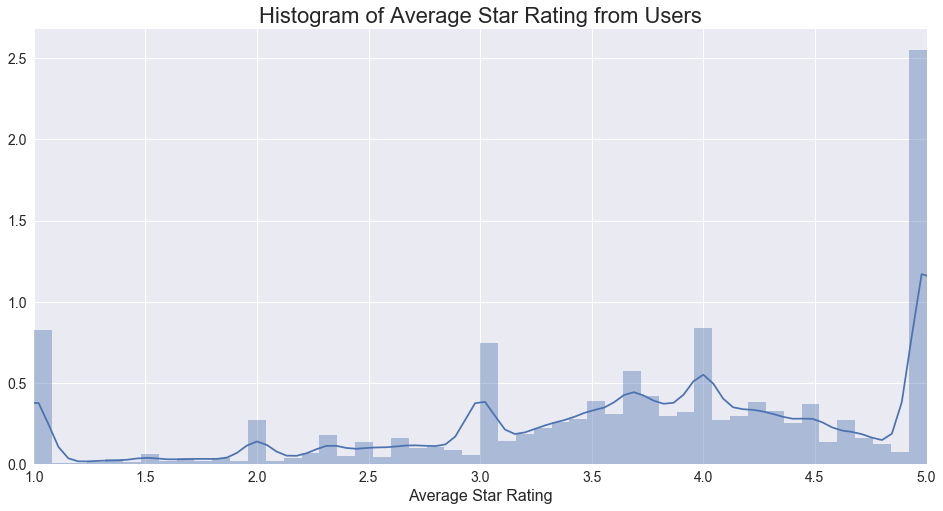

In [29]:
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(df_users["average_stars"].tolist(), ax=ax)
ax.set_title("Histogram of Average Star Rating from Users", fontsize=22);
ax.set_xlabel("Average Star Rating", fontsize=16);
ax.tick_params(labelsize=14);
plt.xlim(1,5);

While proving nothing, this does support the idea that people are more likely to choose 1 or 5 stars and that they tend to be biased toward positive reviews over negative reviews. 

The reason for spikes exactly at the 1-5 integer marks is either due to people who always rate a specific way or who have only rated one business. We can actually test the idea that many users only rate one business!

In [58]:
for i in range(0,11):
    review = df_users[df_users["review_count"] == i]
    print("Percent of users with exactly {0} reviews = {1:.2f}%".format(i,(review.shape[0]/df_users.shape[0])*100))

Percent of users with exactly 0 reviews = 0.10%
Percent of users with exactly 1 reviews = 18.42%
Percent of users with exactly 2 reviews = 12.53%
Percent of users with exactly 3 reviews = 9.50%
Percent of users with exactly 4 reviews = 6.78%
Percent of users with exactly 5 reviews = 5.15%
Percent of users with exactly 6 reviews = 4.11%
Percent of users with exactly 7 reviews = 3.36%
Percent of users with exactly 8 reviews = 2.83%
Percent of users with exactly 9 reviews = 2.44%
Percent of users with exactly 10 reviews = 2.15%


In [56]:
reviews = Counter(df_users["review_count"].tolist())
reviews.most_common(5)

[(1, 244232), (2, 166170), (3, 125947), (4, 89844), (5, 68334)]

So we see that reviewing only one place is by far the most common behavior for a user.

Mean =  23.12
SD = 79.10


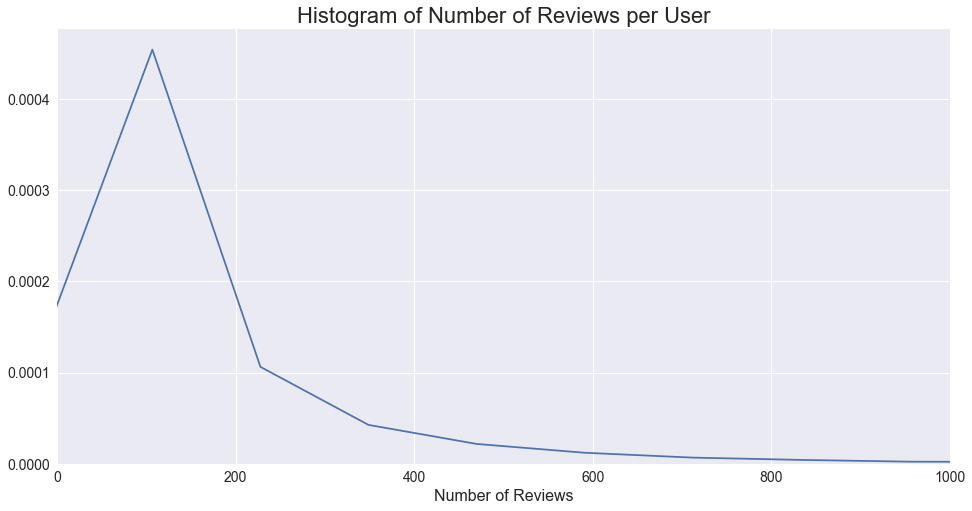

In [46]:
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(df_users["review_count"].tolist(), hist=False, ax=ax)
ax.set_title("Histogram of Number of Reviews per User", fontsize=22);
ax.set_xlabel("Number of Reviews", fontsize=16);
ax.tick_params(labelsize=14);
plt.xlim(0,1000);

print("Mean =  {:.2f}".format(np.mean(df_users["review_count"])))
print("SD = {:.2f}".format(np.std(df_users["review_count"])))

Interestingly, even though most users don't review many businesses, the "average user" reviews 20 businesses because a few users review a LOT of businesses (Yelp elite!!).

Mean =  30.14
SD = 98.21


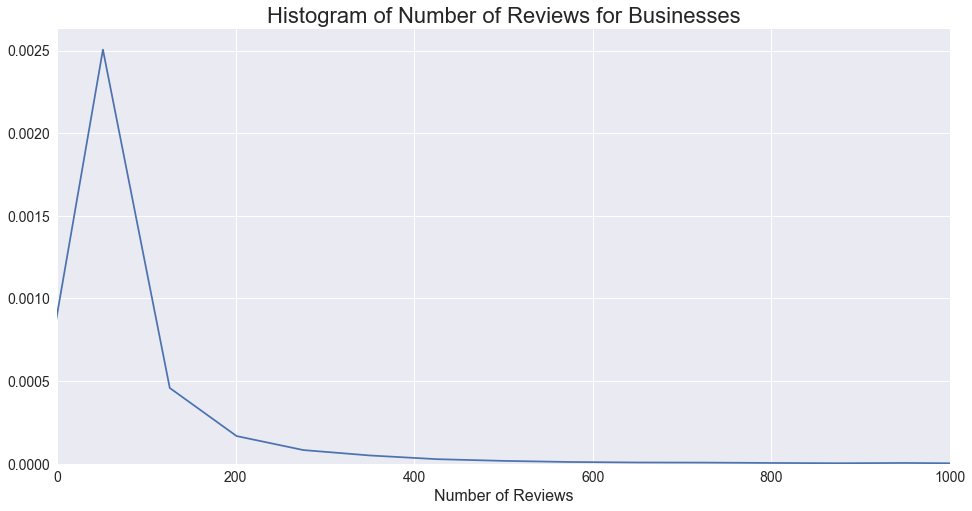

In [47]:
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(df_business["review_count"].tolist(), hist=False, ax=ax)
ax.set_title("Histogram of Number of Reviews for Businesses", fontsize=22);
ax.set_xlabel("Number of Reviews", fontsize=16);
ax.tick_params(labelsize=14);
plt.xlim(0,1000);

print("Mean =  {:.2f}".format(np.mean(df_business["review_count"])))
print("SD = {:.2f}".format(np.std(df_business["review_count"])))

Looking above we see that the average number of reviews for a business is around 30, which is confirmed by this histogram. However, we also saw that the standard deviation was close to 100. There can't be less than 0 reviews, but what this means is that there are many businesses with far more than 30 reviews.